## Exploratory Data Analysis


##### Author: Haleigh Tomlin
##### Date: 6/21/2021

In [1]:
#start working with the smaller dataset
#departments, agencies
#look into the project titles? Ask for guidance if needed
#focus on agency, department, FY, project start year, budget start year, total cost, subproject cost.  Also, which projects have a keyword list? Broken down by agency?

In [1]:
#loading packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
#smaller dataset
d = pd.read_pickle("../../data/dspg21RnD/smaller-final-dataset.pkl")

In [3]:
d["PROJECT_START_YEAR"] = d["PROJECT_START_DATE"].str[-4:]

In [4]:
d.head()

,original index,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,...,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_START_YEAR
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,Active Sites; Affect; Alzheimer's Disease; Amy...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,HHS,NIH,NaN,5F32AG027647-03,...,NaN,93.866,2008,3483.0,NaN,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",2005
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,Affect; Animal Model; Axon; Behavior; Behavior...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,HHS,NIH,NaN,5K99HD056157-02,...,NaN,93.865,2008,39175.0,NaN,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",2007
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,Agreement; Antibodies; base; Binding; Biochemi...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,HHS,NIH,NaN,5F32GM076971-02,...,NaN,93.859,2008,49646.0,NaN,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",2007
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,African; Analysis of Variance; Asians; Birth; ...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,HHS,NIH,NaN,5F31NR009611-03,...,NaN,93.361,2008,20406.0,NaN,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",2006
4,371628,594482,Local potato advisory groups have expressed in...,2010,cost; Health; interest; Manure; Parasitic nema...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,USDA,NIFA,NaN,0219605,...,NaN,10.203,2010,NaN,NaN,1,1,271,"[local, potato, advisory, express, interest, m...",2009


### potentials for EDA:

#what is the avg total cost within the departments/agencies?
#when did most of these projects occur?
#what do IC_Center, ORG_Count, PI_count mean?

visualization of total cost

In [5]:
np.unique(d["DEPARTMENT"])

array(['DOD', 'ED', 'EPA', 'HHS', 'NASA', 'NSF', 'USDA', 'VA'],
      dtype=object)

In [6]:
np.unique(d["AGENCY"])

array(['ACF', 'AHRQ', 'ALLCDC', 'ARS', 'CCCRP', 'CDMRP', 'CNRM', 'DVBIC',
       'EPA', 'FDA', 'FS', 'IES', 'NASA', 'NIDILRR', 'NIFA', 'NIH', 'NSF',
       'VA'], dtype=object)

In [7]:
d.groupby("AGENCY").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar
AGENCY,,,,,,
ACF,853257.848057,7.067602e+05,NaN,1.000000,1.000000,1485.003534
AHRQ,601049.386637,2.126629e+05,NaN,1.030303,1.024096,2785.456371
ALLCDC,540815.652510,4.907351e+05,NaN,1.012548,1.079472,2604.171493
ARS,836016.502278,1.440187e+06,NaN,0.738987,0.989873,2061.058228
CCCRP,739925.181818,4.435069e+06,NaN,1.000000,1.000000,1450.227273
CDMRP,655746.114974,8.620356e+05,NaN,1.052153,1.098512,4138.222705
CNRM,409094.503817,4.582450e+05,NaN,1.000000,1.000000,2950.564885
DVBIC,462909.191919,NaN,NaN,1.000000,1.000000,920.404040
EPA,498730.895455,4.647089e+05,NaN,1.000000,1.000000,1248.385714


In [8]:
d.groupby("DEPARTMENT").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar
DEPARTMENT,,,,,,
DOD,649429.954748,862203.117588,NaN,1.050478,1.095347,4070.245252
ED,917320.553855,502548.429792,NaN,1.010204,1.000000,1809.257937
EPA,498730.895455,464708.870697,NaN,1.000000,1.000000,1248.385714
HHS,567590.883276,490633.598561,297573.30651,1.022190,1.016507,2508.457045
NASA,446629.285727,254419.485095,NaN,1.001014,1.001935,339.732332
NSF,572607.098498,349334.521462,NaN,1.113582,1.112161,2365.800440
USDA,566940.586617,684804.474285,NaN,0.965367,0.999731,1750.539051
VA,733560.005969,NaN,NaN,1.019895,1.013384,3347.116658


In [9]:
d.groupby("FY").mean()

,original index,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,nchar
FY,,,,,,
2008,1.028416e+05,423918.452992,1.000000,1.025650,1.017847,2098.789039
2009,2.137766e+05,431464.490479,1.000000,1.031562,1.025514,2264.243499
2010,2.953528e+05,480739.665816,1.000000,1.036724,1.031922,2352.820741
2011,3.599038e+05,425483.152243,1.000000,1.036140,1.029870,2475.111554
2012,4.742546e+05,412370.169179,276732.671808,1.026543,1.024086,2656.806867
2013,5.546263e+05,413069.835734,1.000000,1.041646,1.035364,2423.135746
2014,6.749725e+05,1.000000,1.000000,1.043051,1.041137,2414.647348
2015,7.635357e+05,443802.812706,291808.757222,1.051488,1.042651,2437.565159
2016,8.453971e+05,477405.951462,294400.533428,1.052611,1.048406,2486.625500


In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690854
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  object 
 4   PROJECT_TERMS               688920 non-null  object 
 5   PROJECT_TITLE               690814 non-null  object 
 6   DEPARTMENT                  690814 non-null  object 
 7   AGENCY                      690814 non-null  object 
 8   IC_CENTER                   289225 non-null  object 
 9   PROJECT_NUMBER              690814 non-null  object 
 10  PROJECT_START_DATE          690814 non-null  object 
 11  PROJECT_END_DATE            690814 non-null  object 
 12  CONTACT_PI_PROJECT_LEADER   690773 non-null  object 
 13  OTHER_PIS     

The variables we want to focus on for the time being are agency, department, fiscal year, project start year, budget start year, total cost, subproject cost, and which projects have a keyword list (by agency).  In total, there are 690,814 observations, and all of them have abstract data.  Of those, 688,920 have keyword lists (so, less than 2k don't have keywords). We have fiscal years and project start years for all of our abstracts.  For the total cost of the projects, we only have 473,617 values, which means that we have the cost for almost 70% of our projects. Of those projects which we have a total cost, we have the budget start date for 258,154, just over half of them (54%). We have the cost of 61,463 (9%) of subprojects.  


Below, I show the distribution of projects in each fiscal year 2008-2019, followed by the distribution of project start years.

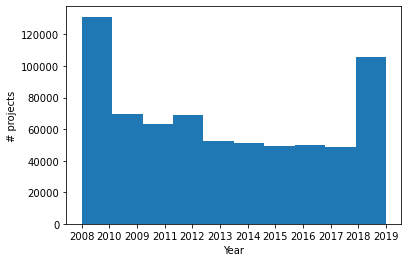

In [19]:
fig, ax = plt.subplots()
ax.hist(d["FY"])
ax.set_xlabel("Year")
ax.set_ylabel("# projects")
plt.show()

In [11]:
np.unique(d["PROJECT_START_YEAR"])

array(['1965', '1970', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'], dtype=object)

In [19]:
pd.to_numeric(d["PROJECT_START_YEAR"])

0         2005
1         2007
2         2007
3         2006
4         2009
          ... 
690850    2018
690851    2019
690852    2018
690853    2019
690854    2018
Name: PROJECT_START_YEAR, Length: 690814, dtype: int64

In [21]:
d.dtypes

original index                  int64
PROJECT_ID                     object
ABSTRACT                       object
FY                             object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY.y                           object
FY_TOTAL_COST                 float64
FY_TOTAL_COS

<ipython-input-20-c305f0f6f8b6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(d["PROJECT_START_YEAR"], rotation = 90)


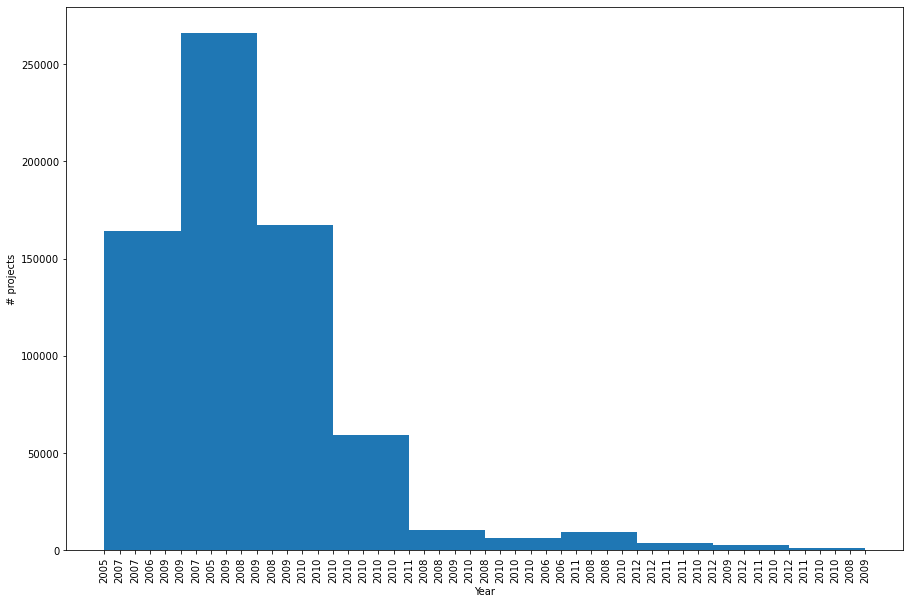

In [20]:
fig, ax = plt.subplots()
ax.hist(d["PROJECT_START_YEAR"])
ax.set_xlabel("Year")
ax.set_xticklabels(d["PROJECT_START_YEAR"], rotation = 90)
ax.set_ylabel("# projects")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

^^ why is that not going back to 1965? And why are there repeats?

In [22]:
d["FY_TOTAL_COST"].isna().sum()

217197

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690854
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  object 
 4   PROJECT_TERMS               688920 non-null  object 
 5   PROJECT_TITLE               690814 non-null  object 
 6   DEPARTMENT                  690814 non-null  object 
 7   AGENCY                      690814 non-null  object 
 8   IC_CENTER                   289225 non-null  object 
 9   PROJECT_NUMBER              690814 non-null  object 
 10  PROJECT_START_DATE          690814 non-null  object 
 11  PROJECT_END_DATE            690814 non-null  object 
 12  CONTACT_PI_PROJECT_LEADER   690773 non-null  object 
 13  OTHER_PIS     

In [24]:
len(d["FY_TOTAL_COST"])

690814

In [25]:
690814-217197

473617

In [26]:
d["PROJECT_END_DATE"].isna().sum()

0

In [ ]:
fig, ax = plt.subplots()
ax.bar(d["DEPARTMENT"], d["FY_TOTAL_COST"])
plt.show()

then, do the same thing with the agencies!?  Can split this up by year, also

In [ ]:
np.unique(d["AGENCY"])

In [ ]:
fig, ax = plt.subplots()
ax.bar(d["AGENCY"], d["FY_TOTAL_COST"])
ax.set_xticklabels(d["AGENCY"], rotation = 90)
ax.set_ylabel("Total Cost (USD)")
plt.show()

In [ ]:
d.size

In [ ]:
d.shape